In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df.isnull().sum().sum()

0

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
df.duplicated().sum()

0

In [40]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [43]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,None
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,None
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,None
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,None
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,None
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,None
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,None
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,None
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,None
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,None


converted 0 and 1 values of section citizen yo yes/no to make it easier to understand 

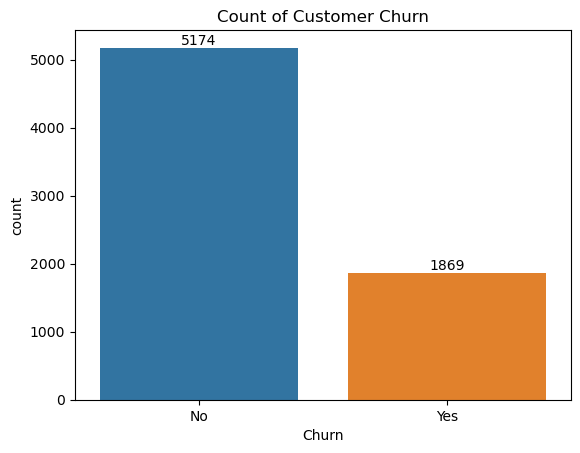

In [59]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customer Churn")
plt.show()

In [54]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb
#plt.pie(gb['Churn'])
#plt.show()

,Churn
Churn,
No,5174
Yes,1869


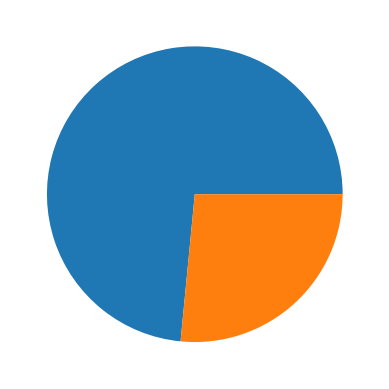

In [57]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'])
plt.show()

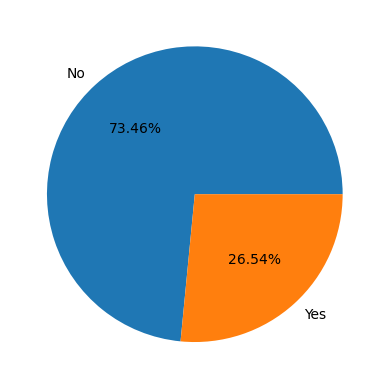

In [58]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index,autopct = "%1.2f%%")
plt.show()

In [62]:
#from the given pie chart we can conclude that 26.54% of our customer have chuend out

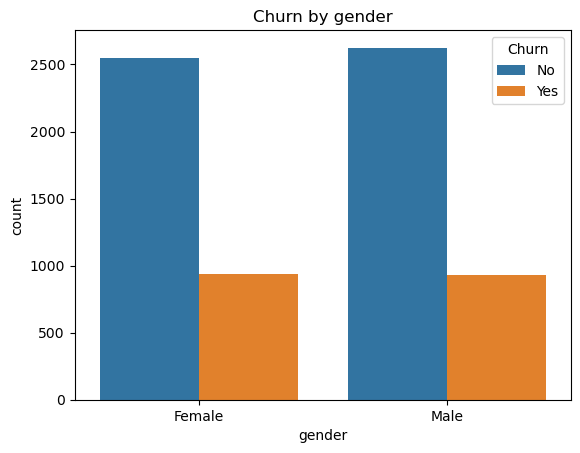

In [67]:


sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by gender")
plt.show()


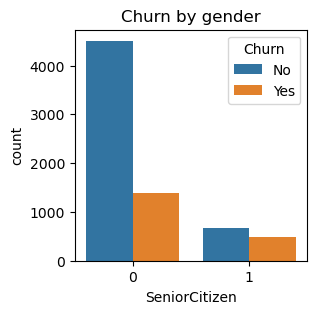

In [68]:
plt.figure(figsize = (3,3))
sns.countplot(x= "SeniorCitizen",data = df,hue = "Churn")
plt.title("Churn by gender")
plt.show()

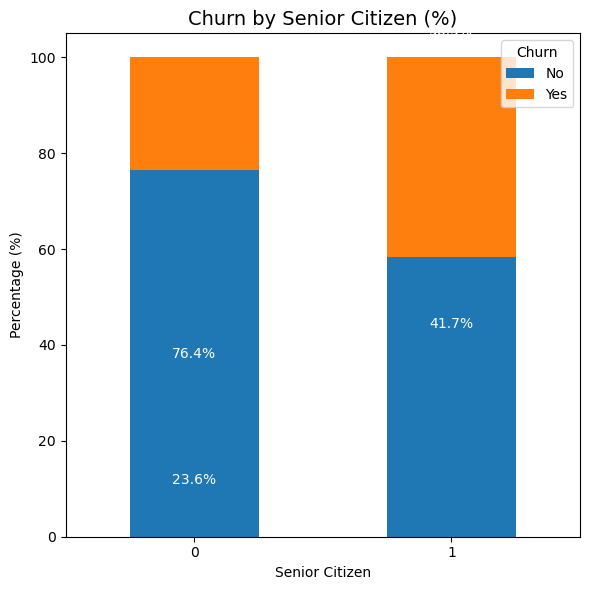

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'SeniorCitizen' and 'Churn' columns
# Prepare data for stacked bar chart
data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
data_pivot = data.pivot(index='SeniorCitizen', columns='Churn', values='Count')

# Calculate percentages
data_pivot_percent = data_pivot.div(data_pivot.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 6))
data_pivot_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Add percentage labels on the bars
for i, col in enumerate(data_pivot_percent.columns):
    for j, val in enumerate(data_pivot_percent[col]):
        if val > 0:  # Skip adding labels for 0%
            ax.text(j, data_pivot_percent.iloc[:j, i].sum() + val / 2, f'{val:.1f}%', 
                    ha='center', va='center', color='white', fontsize=10)

# Customization
plt.title('Churn by Senior Citizen (%)', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


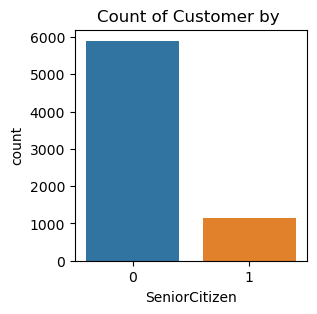

In [70]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen",data = df)
plt.title("Count of Customer by ")
plt.show()

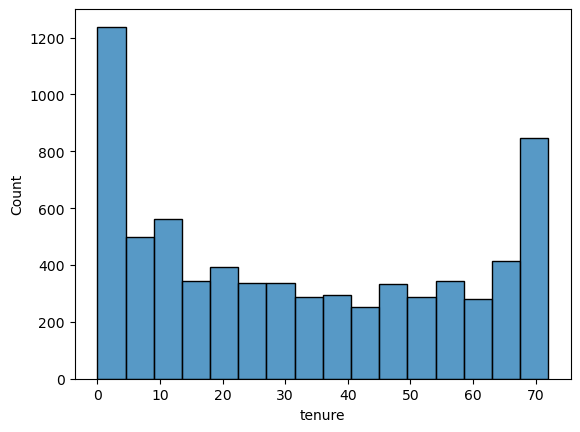

In [72]:
sns.histplot(x= "tenure", data = df)
plt.show()

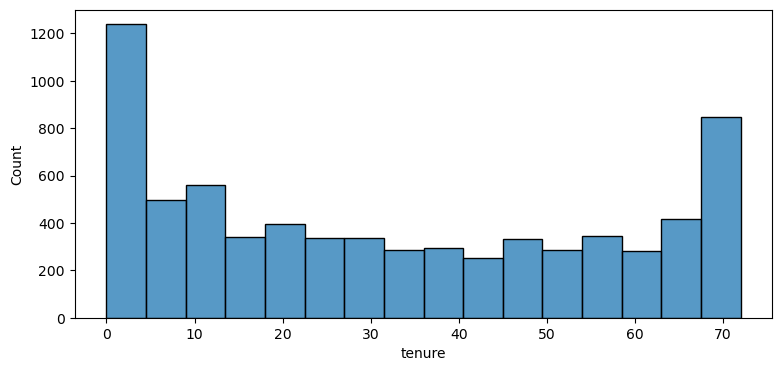

In [73]:
plt.figure(figsize = (9,4))
sns.histplot(x= "tenure", data = df)
plt.show()

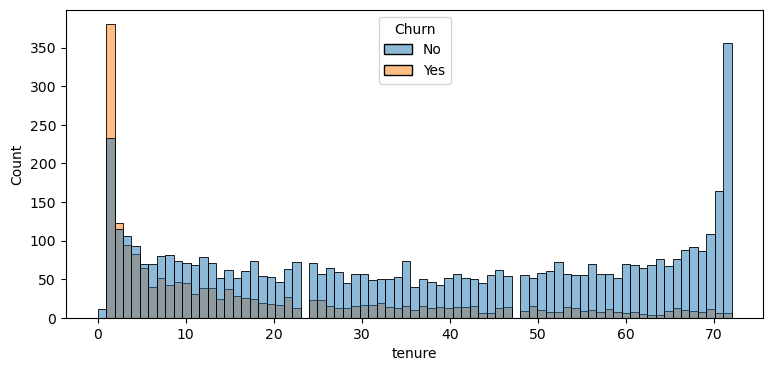

In [74]:
plt.figure(figsize = (9,4))
sns.histplot(x= "tenure", data = df,bins = 75 , hue = "Churn")
plt.show()

In [75]:
#people who have used our service for a long time have stayed and people who have used our service 


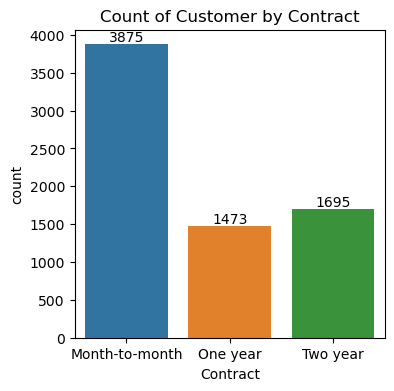

In [77]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data  = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

In [78]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

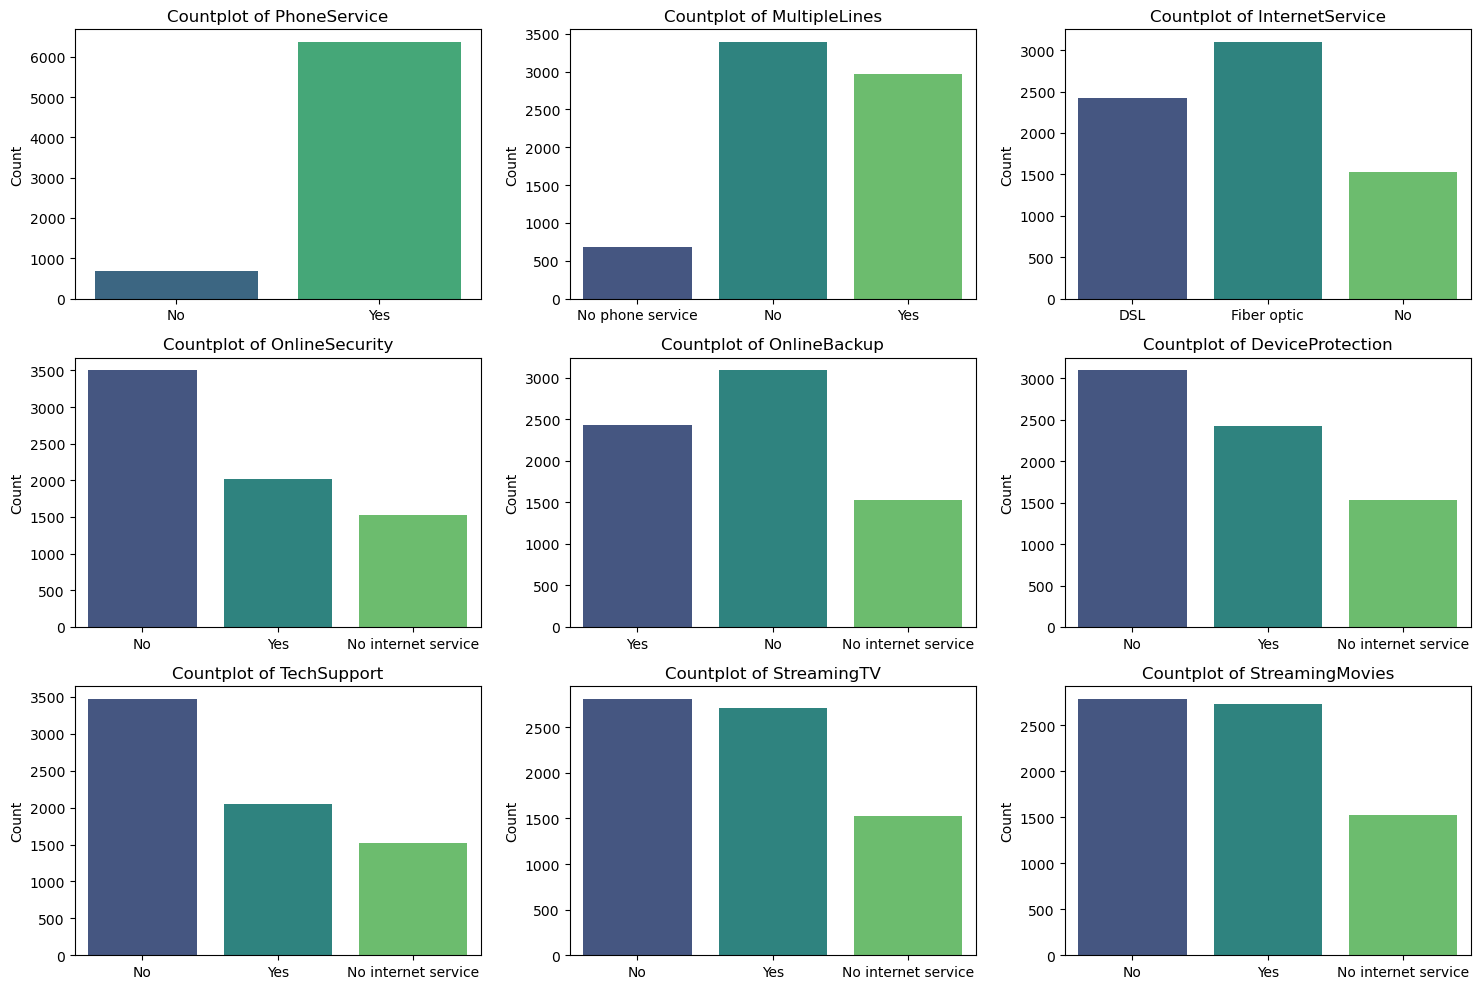

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed, rounding up
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove unused subplots if columns < total grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


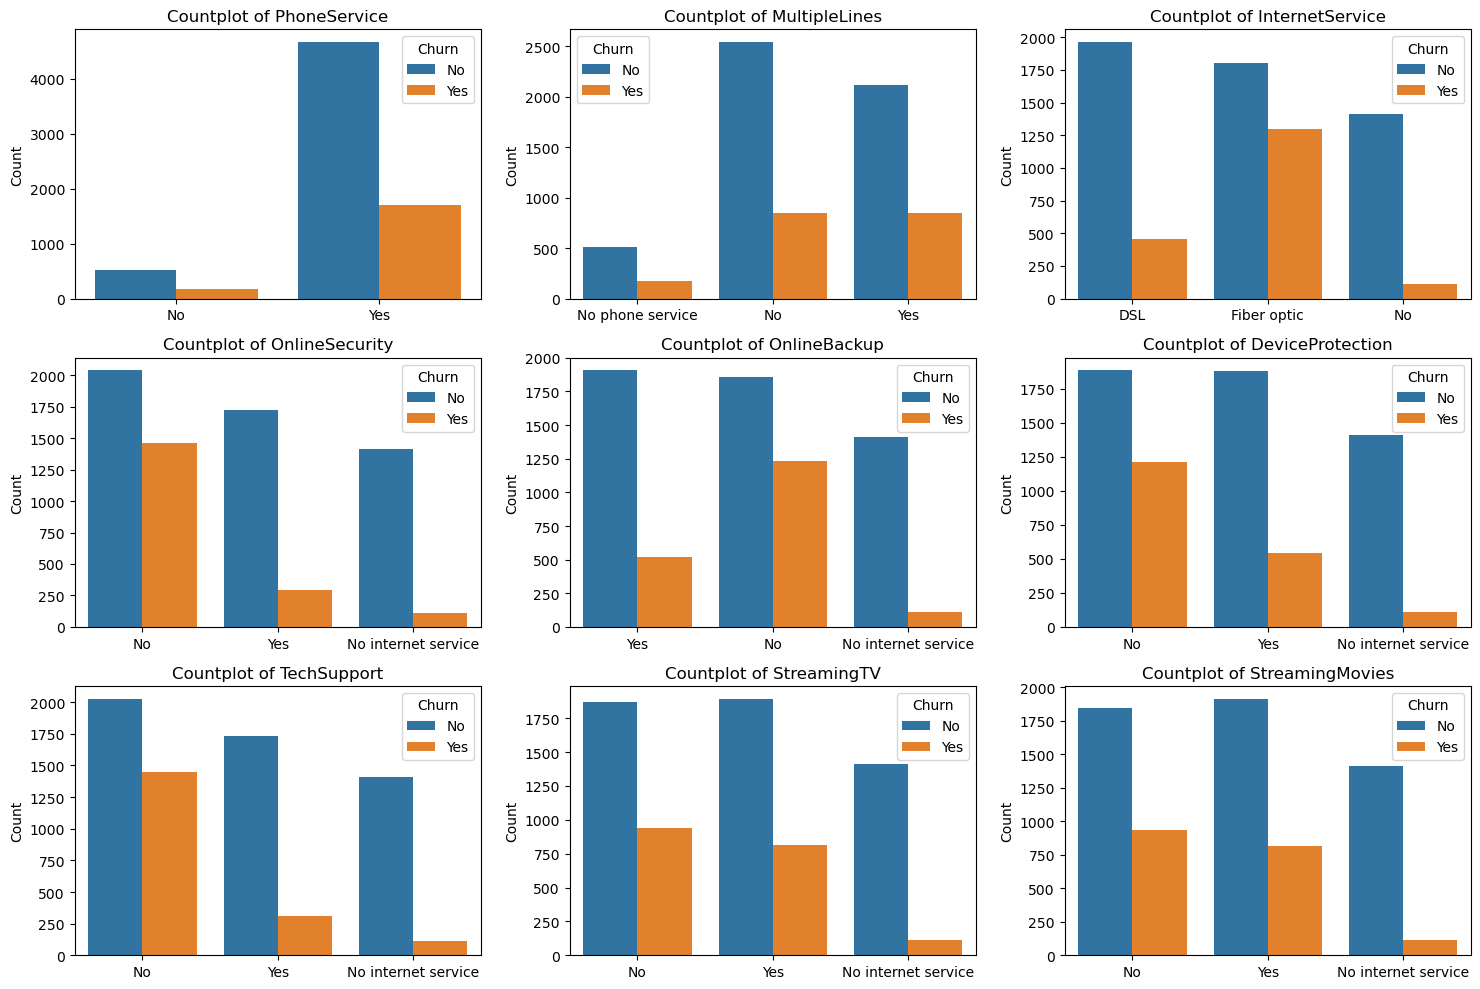

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed, rounding up
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove unused subplots if columns < total grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


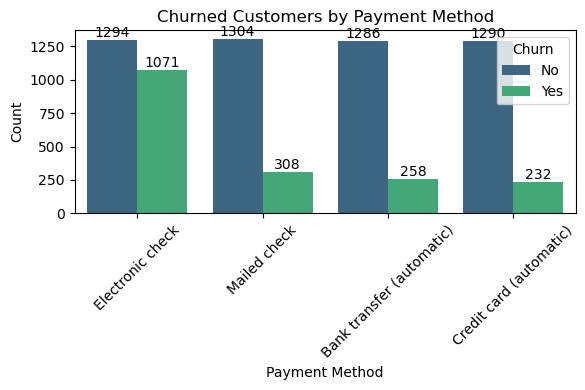

In [84]:
plt.figure(figsize=(6, 4))  # Corrected `figure` parameter to `figsize`
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn", palette="viridis")

# Adding bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Churned Customers by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
